In [1]:
import pandas as pd
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import re 
import random
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
lemmer = WordNetLemmatizer()
stop_words_nltk = set(stopwords.words('english'))
import scattertext as st

In [33]:
stop_words_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [73]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection.csv')

In [36]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [74]:
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [w for w in [lemmer.lemmatize(token) for token in tokens] if not w in stop_words_nltk]

remove_punct_dict = dict((ord(punct), ' ') for punct in string.punctuation)

def LemNormalize(text):
#     text = process(text)
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def process(text):
    text = re.sub('\W+', ' ', text)
    text = re.sub(r'[0-9]', ' ', text)
    x = LemNormalize(str(text))
    text = ' '.join(x)
    collect_text = []

    for items in text.split():
        if len(items) > 1:
            collect_text.append(items)
    return ' '.join(collect_text)

In [75]:
df['processed'] = df.text.apply(lambda x: process(x))

In [27]:
df.columns

Index(['Unnamed: 0', 'text', 'class', 'processed'], dtype='object')

In [76]:
df.to_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

In [77]:
df = pd.read_csv('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_processed.csv')

In [5]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,text,class,processed
0,0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threatening suiciderecently left wife ...
1,1,3,Am I weird I don't get affected by compliments...,non-suicide,weird get affected compliments coming someone ...
2,2,4,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost never hear bad year ever swear ...
3,3,8,i need helpjust help me im crying so hard,suicide,need helpjust help im crying hard
4,4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,losthello name adam struggling years afraid pa...
...,...,...,...,...,...
232069,232069,348103,If you don't like rock then your not going to ...,non-suicide,like rock going get anything go https musictas...
232070,232070,348106,You how you can tell i have so many friends an...,non-suicide,tell many friends lonely everything deprived p...
232071,232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,pee probably tastes like salty tea😏💦‼️ someone...
232072,232072,348108,The usual stuff you find hereI'm not posting t...,suicide,usual stuff find herei posting sympathy pity k...


In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
#CREATING A DATAFRAME FOR SCATTERTEXT
scatter_data = df[['processed', 'class']]
LE = LabelEncoder()
scatter_data['category'] = LE.fit_transform(df['class'])
scatter_data.tail()

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,processed,class,category
232069,like rock going get anything go http musictast...,non-suicide,0
232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,usual stuff find herei posting sympathy pity k...,suicide,1
232073,still beaten first bos hollow knight fought ti...,non-suicide,0


In [80]:
scatter_data = scatter_data.dropna()


In [43]:
for i in range(100, 1000, 100):
    scatter_data_x = scatter_data[scatter_data['processed'].map(len) > i]
    print(scatter_data_x.category.value_counts())


1    101688
0     58237
Name: category, dtype: int64
1    82380
0    27252
Name: category, dtype: int64
1    66640
0    16493
Name: category, dtype: int64
1    54162
0    11051
Name: category, dtype: int64
1    44355
0     7905
Name: category, dtype: int64
1    36561
0     5909
Name: category, dtype: int64
1    30317
0     4594
Name: category, dtype: int64
1    25461
0     3585
Name: category, dtype: int64
1    21526
0     2901
Name: category, dtype: int64


In [81]:
scatter_data_x = scatter_data[scatter_data['processed'].map(len) > 1000]

In [10]:
scatter_data_x.category.value_counts()

1    18288
0     2353
Name: category, dtype: int64

In [82]:
#CHECKING OUT COMMON WORDS IN r/SuicideWatch USING CVEC
cvec = CountVectorizer(stop_words='english')
cvec.fit(scatter_data_x['processed'])

CountVectorizer(stop_words='english')

In [83]:
f_names = len(cvec.get_feature_names())
f_names

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


68238

In [34]:
#CREATING A DATAFRAME OF EXTRACTED WORDS for non-suicide
created_df = pd.DataFrame(cvec.transform(
    scatter_data_x.processed[scatter_data_x['category'] == 0]).todense(), 
    columns=cvec.get_feature_names())
total_words = created_df.sum(axis=0)
    

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [46]:
    #CREATING A DATAFRAME OF EXTRACTED WORDS for together
    created_df = pd.DataFrame(cvec.transform(scatter_data_x['processed']).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'filler'),
  Text(0, 1, 'fuck'),
  Text(0, 2, 'like'),
  Text(0, 3, 'mom'),
  Text(0, 4, 'day'),
  Text(0, 5, 'gt'),
  Text(0, 6, 'lt'),
  Text(0, 7, 'sus'),
  Text(0, 8, 'cheese'),
  Text(0, 9, 'ur'),
  Text(0, 10, 'know'),
  Text(0, 11, 'ni'),
  Text(0, 12, 'pop'),
  Text(0, 13, 'cum'),
  Text(0, 14, 'time'),
  Text(0, 15, 'people'),
  Text(0, 16, 'cecil'),
  Text(0, 17, 'really'),
  Text(0, 18, 'want'),
  Text(0, 19, 'school'),
  Text(0, 20, 'na'),
  Text(0, 21, 'got'),
  Text(0, 22, 'think'),
  Text(0, 23, 'said'),
  Text(0, 24, 'friends'),
  Text(0, 25, 'make'),
  Text(0, 26, 'feel'),
  Text(0, 27, 'life'),
  Text(0, 28, 'good'),
  Text(0, 29, 'paul'),
  Text(0, 30, 'jake'),
  Text(0, 31, 'gon'),
  Text(0, 32, 'say'),
  Text(0, 33, 'going'),
  Text(0, 34, 'things'),
  Text(0, 35, 'love

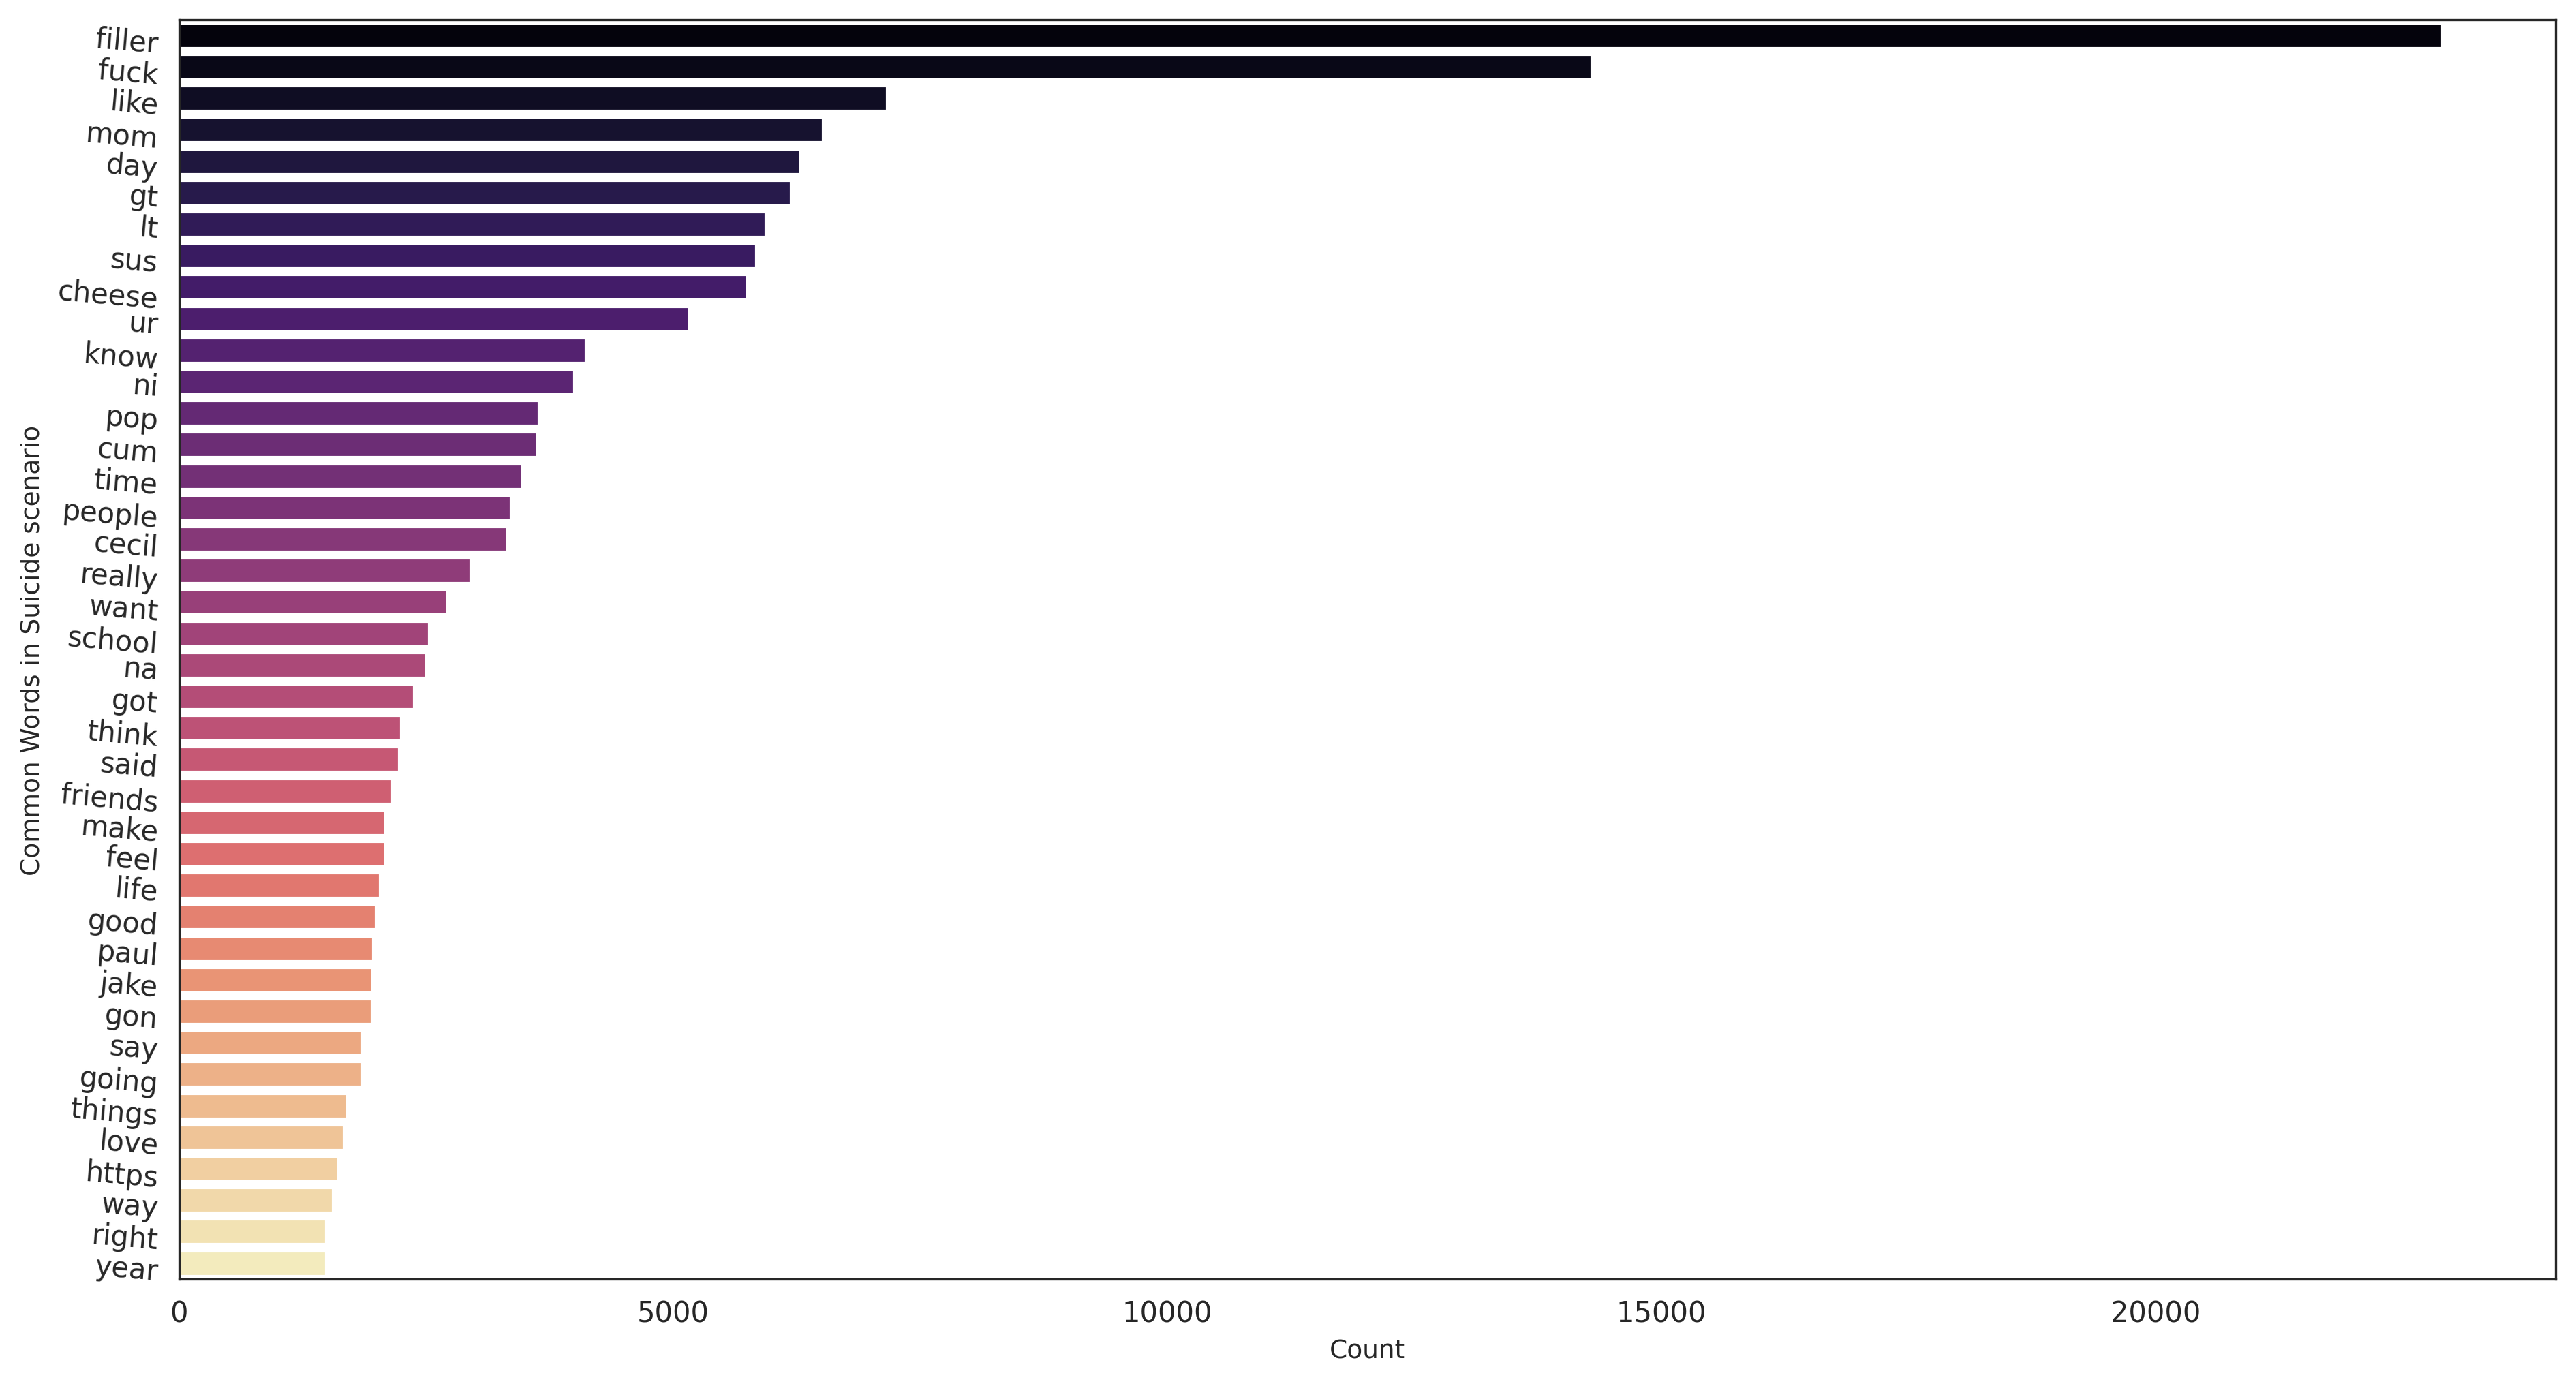

In [35]:
    #<<<WORDCLOUD>>>
    #CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
    top_40_words = total_words.sort_values(ascending = False).head(40)
    top_40_words_df = pd.DataFrame(top_40_words, columns = ["count"])
    #PLOTTING THE COUNT OF THE TOP 20 WORDS
    sns.set_style("white")
    plt.figure(figsize = (15, 8), dpi=300)
    ax = sns.barplot(y= top_40_words_df.index, x="count", 
                     data=top_40_words_df, palette = "magma")
    
    plt.xlabel("Count", fontsize=9)
    plt.ylabel('Common Words in {}'.format("Suicide scenario"), fontsize=9)
    plt.yticks(rotation=-5)

In [41]:
# Find most common words in top 40 words in each category
for i in range(len(nosui)):
    for j in range(len(sui)):
        if nosui[i][2] == sui[j][2]:
            print(sui[j][2])

like
day
know
time
people
really
want
school
got
think
friends
make
feel
life
good
going
things
love
way
right
year


In [37]:
nosui =  [(0, 0, 'filler'),
  (0, 1, 'fuck'),
  (0, 2, 'like'),
  (0, 3, 'mom'),
  (0, 4, 'day'),
  (0, 5, 'gt'),
  (0, 6, 'lt'),
  (0, 7, 'sus'),
  (0, 8, 'cheese'),
  (0, 9, 'ur'),
  (0, 10, 'know'),
  (0, 11, 'ni'),
  (0, 12, 'pop'),
  (0, 13, 'cum'),
  (0, 14, 'time'),
  (0, 15, 'people'),
  (0, 16, 'cecil'),
  (0, 17, 'really'),
  (0, 18, 'want'),
  (0, 19, 'school'),
  (0, 20, 'na'),
  (0, 21, 'got'),
  (0, 22, 'think'),
  (0, 23, 'said'),
  (0, 24, 'friends'),
  (0, 25, 'make'),
  (0, 26, 'feel'),
  (0, 27, 'life'),
  (0, 28, 'good'),
  (0, 29, 'paul'),
  (0, 30, 'jake'),
  (0, 31, 'gon'),
  (0, 32, 'say'),
  (0, 33, 'going'),
  (0, 34, 'things'),
  (0, 35, 'love'),
  (0, 36, 'https'),
  (0, 37, 'way'),
  (0, 38, 'right'),
  (0, 39, 'year')]

In [32]:
 sui = [(0, 0, 'like'),
  (0, 1, 'life'),
  (0, 2, 'want'),
  (0, 3, 'know'),
  (0, 4, 'feel'),
  (0, 5, 'time'),
  (0, 6, 'people'),
  (0, 7, 'really'),
  (0, 8, 'think'),
  (0, 9, 'going'),
  (0, 10, 'friends'),
  (0, 11, 'years'),
  (0, 12, 'things'),
  (0, 13, 'day'),
  (0, 14, 'got'),
  (0, 15, 'school'),
  (0, 16, 'help'),
  (0, 17, 'make'),
  (0, 18, 'way'),
  (0, 19, 'family'),
  (0, 20, 'good'),
  (0, 21, 'year'),
  (0, 22, 'work'),
  (0, 23, 'better'),
  (0, 24, 'love'),
  (0, 25, 'anymore'),
  (0, 26, 'fucking'),
  (0, 27, 'told'),
  (0, 28, 'live'),
  (0, 29, 'job'),
  (0, 30, 'suicide'),
  (0, 31, 'end'),
  (0, 32, 'person'),
  (0, 33, 'parents'),
  (0, 34, 'right'),
  (0, 35, 'talk'),
  (0, 36, 'thing'),
  (0, 37, 'thought'),
  (0, 38, 'die'),
  (0, 39, 'tried')]

In [84]:
#PARSING TEXT FOR SCATTERTEXT
nlp = st.whitespace_nlp_with_sentences
scatter_data_x['parsed'] = scatter_data_x.processed.apply(nlp)
scatter_data.tail()

/home/ifte-home/venvs/exp-Env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,processed,class,category
232069,like rock going get anything go http musictast...,non-suicide,0
232070,tell many friend lonely everything deprived pr...,non-suicide,0
232071,pee probably taste like salty tea someone dran...,non-suicide,0
232072,usual stuff find herei posting sympathy pity k...,suicide,1
232073,still beaten first bos hollow knight fought ti...,non-suicide,0


In [46]:
scatter_data_x.processed[scatter_data_x['category'] == 0]

23        posting galadriel opening monologue every day ...
134       posting every day get girlfriend day day im he...
152       boyfriend getting wisdom teeth removed today w...
191       anyone else feel like neglected parents never ...
318       marble blast ultra nostalgia nostalgia nostalg...
                                ...                        
231810    voting information us voting first time year e...
231832    staying watching youtube videos helped save ki...
231950    ruined felt like reflecting past year list nob...
231967    funniest joke hear today assuming healthy hear...
232028    got friend zoned talking girl year already say...
Name: processed, Length: 2353, dtype: object

In [115]:
scatter_data_x.iloc[0,3]

losthello name adam struggling year afraid past year thought suicide fear anxiety close limit quiet long scared come family feeling year ago losing aunt triggered everyday feeling hopeless lost guilty remorseful thing done life thought like little experienced life time revealed feeling family broke saw cut watching get worried something portrayed average day made feel absolutely dreadful later found wa attempt survivor attempt od overdose pill attempt hanging happened wa blackout pill never went noose still afraid first therapy wa diagnosed severe depression social anxiety eating disorder wa later transferred fucken group therapy reason made feel anxious eventually last session therapy showed result daily check feeling wa step survey mom dad come find putting feeling horrible afraid anxious everyday mom ha absolutely amazing described happiest ever seen therapy ha helped eventually wa put sertaline anti anxiety anti depression sorry forgot never finished first prescription ever found r

In [117]:
scatter_data_x.category

4         1
22        1
23        0
71        1
73        1
         ..
232026    1
232028    0
232040    1
232053    1
232062    1
Name: category, Length: 20427, dtype: int64

In [121]:
scatter_data_x.to_pickle('/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_scatter.csv')

In [2]:
import pandas as pd
from ast import literal_eval

In [3]:
scatter_data = pd.read_pickle(
    '/home/ifte-home/Documents/mental_health/suicide/Suicide_Detection_scatter.csv'
)

In [4]:
scatter_data

,processed,class,category,parsed
4,losthello name adam struggling year afraid pas...,suicide,1,"(losthello, name, adam, struggling, year, afra..."
22,trapped inside voiddear whoever care enough re...,suicide,1,"(trapped, inside, voiddear, whoever, care, eno..."
23,posting galadriel opening monologue every day ...,non-suicide,0,"(posting, galadriel, opening, monologue, every..."
71,anyone planning suicide long term future depre...,suicide,1,"(anyone, planning, suicide, long, term, future..."
73,screenwriting course script character commit s...,suicide,1,"(screenwriting, course, script, character, com..."
...,...,...,...,...
232026,mental social problem killing mebackground nat...,suicide,1,"(mental, social, problem, killing, mebackgroun..."
232028,got friend zoned talking girl year already say...,non-suicide,0,"(got, friend, zoned, talking, girl, year, alre..."
232040,depressed suicidal need talk venthey know righ...,suicide,1,"(depressed, suicidal, need, talk, venthey, kno..."
232053,memoir lifeim holding anything back post work ...,suicide,1,"(memoir, lifeim, holding, anything, back, post..."


In [4]:
#DEFINING A CORPUS FOR SCATTERTEXT VISUALISATION
corpus = st.CorpusFromParsedDocuments(scatter_data, category_col="class", 
                                      parsed_col="parsed").build().get_unigram_corpus().compact(
    st.AssociationCompactor(500))

In [49]:
type(corpus)

scattertext.ParsedCorpus.ParsedCorpus

In [6]:
from scattertext import CorpusFromPandas, produce_scattertext_explorer

In [8]:
#CREATING A SCATTERTEXT PLOT
html = produce_scattertext_explorer(corpus,
                                    category='suicide',
                                    category_name='Suicide',
                                    not_category_name='Depression',
                                    width_in_pixels=1000,
                                    jitter=0.1,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=scatter_data['class']
                                   )
file_name = '/home/ifte-home/Documents/mental_health/suicide/Reddit_ScattertextRankDataJitter.html'
open(file_name, 'wb').write(html.encode('utf-8'))


39184092

In [40]:
from pprint import pprint

In [87]:
# Here are the terms that are most associated with Suicide:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Suicide Score'] = corpus.get_scaled_f_scores('suicide')
pprint(list(term_freq_df.sort_values(by='Suicide Score', ascending=False).index[:20]))

['life',
 'feel',
 'want',
 'year',
 'even',
 'going',
 'would',
 'much',
 'know',
 'thing',
 'time',
 'get',
 'think',
 'people',
 'really',
 'never',
 'thought',
 'friend',
 'wa',
 'go']


In [88]:
term_freq_df = corpus.get_term_freq_df()
term_freq_df['Non-Suicide Score'] = corpus.get_scaled_f_scores('non-suicide')
pprint(list(term_freq_df.sort_values(by='Non-Suicide Score', ascending=False).index[:20]))

['filler',
 'sus',
 'cheese',
 'ur',
 'ni',
 'lt',
 'cum',
 'pop',
 'cecil',
 'gt',
 'fuck',
 'paul',
 'jake',
 'mom',
 'http',
 'na',
 'gon',
 'penis',
 'cake',
 'bacon']


In [29]:
df = st.SampleCorpora.ConventionData2012.get_data()

In [30]:
df.head()

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [58]:
import scattertext as st

df = st.SampleCorpora.ConventionData2012.get_data().assign(
    parse=lambda df: df.text.apply(st.whitespace_nlp_with_sentences)
)

corpus = st.CorpusFromParsedDocuments(
    df, category_col='party', parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

html = st.produce_scattertext_explorer(
    corpus,
    category='democrat', category_name='Democratic', not_category_name='Republican',
    minimum_term_frequency=0, pmi_threshold_coefficient=0,
    width_in_pixels=1000, metadata=corpus.get_df()['speaker'],
    transform=st.Scalers.dense_rank
)

In [60]:
open('./demo_compact.html', 'w').write(html)


1655959